<h2>Who wants a piece of Py?</h2>

### <h1>WhoPy #003</h1>
<h2>What about the pinted stick ?</h2>

Na początek załadujemy kilka gotowych bibliotek python'a
importujemy i wykonujemy ten blok <b>Shift+ENTER</b>

In [1]:
import numpy as np  #to taka biblioteka z funkcjami numerycznymi jak tablice i inne takie tam      
import matplotlib.pyplot as plt #to biblioteka pozwalajaca nam wykreslać wykresy
from scipy.interpolate import spline
from scipy.interpolate import InterpolatedUnivariateSpline

teraz czas załadować naszą własną bibliotekę<br>
importujemy i wykonujemy ten blok <b>Shift+ENTER</b>

In [2]:
#importing our own library
from thermalModelLibrary import functionsLibrary as tml
from thermalModelLibrary import geometryLib as gml

In [55]:
time = np.arange(0, 10, 0.002) # Zdefiniujmy sobie wektor czasu
#Zdefiniujmy funkcję opisująca prąd w czasie
def Icw(czas, czasMax, iRMS):
    if czas <= czasMax:
        return iRMS
    else:
        return 0
    
#Zwektoryzujmy nasza funkcję opisująca prąd (zapiszmy jako wektor)
Icw_vector = np.vectorize(Icw)
current = Icw_vector(time,3,25e3)


masterResultsArray = [] # Superzestaw wszytskich wyników
masterIndex = 0 # Indeks 

tempMaxArray = []
segmentsArray = []
segmentsXpositionArray = []


for analiza in range(2,15,3):

    
    copperBarGeometry = np.array([\
                                  [40,10,10,0],\
                                  [40,10,15,14],\
                                  [40,10,15-analiza,0],\
                                  [40,10,200,0],\
                                  [40,10,15-analiza,0],\
                                  [40,10,15,14],\
                                  [40,10,10,0],\
                                  ])
    if masterIndex > 0: 
        copperBarGeometry = gml.slicer(copperBarGeometry)
    
    print('Elementów szyny: '+str(len(copperBarGeometry)))
          
    masterResultsArray.append(tml.mainAnalysis(analysisName='Analiza ['+str(analiza)+']',\
                               geometryArray=copperBarGeometry,\
                               timeArray=time,\
                               currentArray=current,\
                               HTC=25, Emiss=0.2,\
                               ambientTemp=25, barStartTemperature=25,\
                               thermalConductivity=401, materialDensity=8920, materialCp=385))
    
    
    
    # Zapiszmy sobie pozycje X posczegolnych segmentow
    
    temporatyXpositionArray = []
    totalXsoFar = 0.0
    
    for segment in range(len(copperBarGeometry)):
        totalXsoFar += 0.5*copperBarGeometry[segment][2]
        temporatyXpositionArray.append(totalXsoFar)
        totalXsoFar += 0.5*copperBarGeometry[segment][2]
        
    segmentsXpositionArray.append(temporatyXpositionArray)
    
    
    #tml.plotCurves(timeTable=time,\
    #           dataArray=masterResultsArray[masterIndex],\
    #           plotName='Symulacja'+str(analiza),xLabel='time [s]',yLabel='Temperature [degC]',\
    #           curvesLabelArray = False)
    
    
    tempMaxArray.append(np.amax(masterResultsArray[masterIndex]))
    segmentsArray.append(len(copperBarGeometry))
    
    masterIndex +=1
    







Elementów szyny: 7
Starting analysis: Analiza [2]
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Elementów szyny: 26
Starting analysis: Analiza [5]
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Elementów szyny: 36
Starting analysis: Analiza [8]
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Elementów szyny: 62
Starting analysis: Analiza [11]
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Elementów szyny: 252
Starting analysis: Analiza [14]
Progress: |██████████████████████████████████████████████████| 100.0% Complete


<p>a teraz nieco inna zabawa z geometrią. SubSegmentacja - taka wyszukana nazwa</p>
<p> Pamiętaj <b>Shift+ENTER</b>.</p>

Wyniki dla czasu t=3.0s


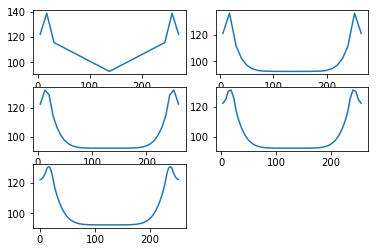

In [67]:
def temperatureDistribution(timeSample):

    fig = plt.figure()
    wykres0 = fig.add_subplot(3,2,1)
    wykres1 = fig.add_subplot(3,2,2)
    wykres2 = fig.add_subplot(3,2,3)
    wykres3 = fig.add_subplot(3,2,4)
    wykres4 = fig.add_subplot(3,2,5)

    print('Wyniki dla czasu t='+str(time[timeSample])+'s')

    wykres0.plot(segmentsXpositionArray[0], masterResultsArray[0][timeSample][:])
    wykres1.plot(segmentsXpositionArray[1], masterResultsArray[1][timeSample][:])
    wykres2.plot(segmentsXpositionArray[2], masterResultsArray[2][timeSample][:])
    wykres3.plot(segmentsXpositionArray[3], masterResultsArray[3][timeSample][:])
    wykres4.plot(segmentsXpositionArray[4], masterResultsArray[4][timeSample][:])

    
#interactive plotting in separate window
#%matplotlib nbagg
#plt.switch_backend('PyQt5')

temperatureDistribution(1500)
plt.show()

5


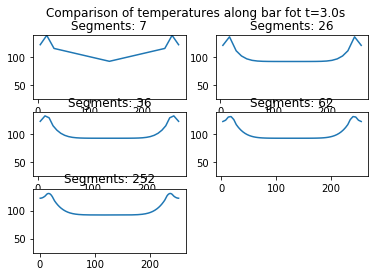

In [131]:
numberOfAnalyses = len(masterResultsArray)
print(numberOfAnalyses)

def temperatureDistribution(timeSample):

    maxTemp = np.amax(tempMaxArray)
    minTemp = 25
    
    fig = plt.figure()
    fig.suptitle("Comparison of temperatures along bar fot t="+str(time[timeSample])+"s")

    for analysis in range(len(masterResultsArray)):
        wykres = fig.add_subplot(3,1+int(len(masterResultsArray)/3),analysis+1)
        wykres.plot(segmentsXpositionArray[analysis], masterResultsArray[analysis][timeSample][:])
        wykres.set_title('Segments: '+str(segmentsArray[analysis]))
        wykres.set_ylim([minTemp, maxTemp])

temperatureDistribution(1500)
plt.show()
    

<p> Warto zauważyć, że dokładniejsze odwzorowanie geometrii segmantami wpływa na wartość wyników. Mechanizm z którego to wynika jest dość oczywisty (chodzi o udział przewodnictwa pomiędzy segmentami w transporcie energii). Jednak na ile jest to zbliżanie się do rzeczywistości a na ile błąd?</p>
<p> daje do myśelenia choćiażby w odniesieniu do analiz FEM - bo to jest wprost analogia do wielkości elementów siatki.</p>

In [129]:
daneZanalizy = np.array(list(zip(segmentsArray,tempMaxArray)))

print(daneZanalizy)


[[   7.          138.88204759]
 [  26.          136.28914257]
 [  36.          132.146106  ]
 [  62.          130.95771244]
 [ 252.          130.61905407]]



<h3>keep the science in your heart!</h3>
<p>Tomek</p>
<div style='background-color: #aaaaaa; font-style: italic;'>#sciencematters</div>